# Exploration of FEMNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.utils.model_utils import read_data

%matplotlib inline

First, print the basic statistics of the dataset (including histogram of number of samples per user)

In [2]:
!cd data/utils && python3 stats.py --name femnist && cd ../..

####################################
DATASET: femnist
3500 users
783564 samples (total)
223.88 samples per user (mean)
num_samples (std): 87.17
num_samples (std/mean): 0.39
num_samples (skewness): 0.81
0 	 1
20 	 4
40 	 11
60 	 5
80 	 16
100 	 66
120 	 126
140 	 393
160 	 1241
180 	 329
200 	 46
220 	 61
240 	 94
260 	 103
280 	 123
300 	 156
320 	 152
340 	 166
360 	 159
380 	 138
400 	 77
420 	 29
440 	 2
460 	 1
480 	 0


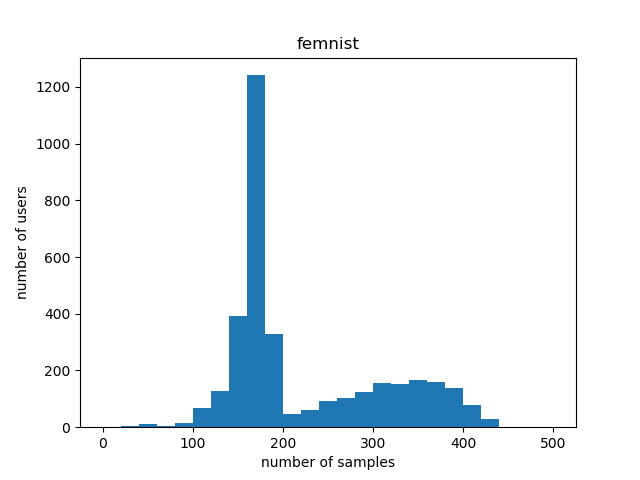

In [3]:
from IPython.display import Image
Image(filename='data/femnist/data/femnist_hist.png')

Next, we take a look at some samples and compare a couple of users to get a feeling for the heterogeneity across users.

In [4]:
train_data_dir = 'data/femnist/data/train'
test_data_dir = 'data/femnist/data/test'
train_clients, train_groups, train_data, test_data = read_data(train_data_dir, test_data_dir)

In [5]:
num_data = []
for k in train_data.keys():
    example = train_data[k]
    num_data.append(len(example['y']))    

In [6]:
hist, bins = np.histogram(num_data, bins=100)

703651


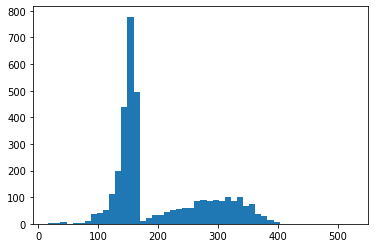

In [7]:
h = plt.hist(num_data, bins=50)
print(sum(num_data))

In [8]:
def get_examples_from_class(c, data, users):
    examples = {}
    for u in users:
        data_x = np.array(data[u]['x'])
        mask_y = np.array(data[u]['y']) == c

        examples[u] = data_x[mask_y].reshape(-1, 28, 28)
    return examples   

In [9]:
# pick a random set of users and look at a predefined set of classes for each
# (classes: 0-9 digits, 10 - 35 lc letter, 36 - 61 uc letters)
classes = [i for i in range(62)]
users = np.random.choice(train_clients, 5, replace=False)
img_shape = (28, 28)
n_examples = 5

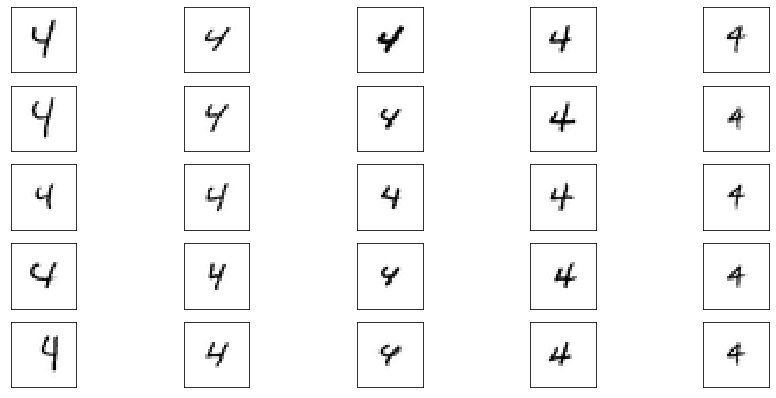

In [10]:
# visualize 4s
examples = get_examples_from_class(classes[4], train_data, users)
fig, axes = plt.subplots(n_examples, len(users), subplot_kw={'xticks': [], 'yticks': []}, figsize=(15, 7))
# , gridspec_kw={'wspace': .5, 'hspace': .1}
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try:
            axes[i, j].imshow(examples[users[j]][i], cmap='gray', interpolation='nearest')
        except IndexError:
            axes[i, j].imshow(np.zeros((28, 28)), cmap='gray')
            

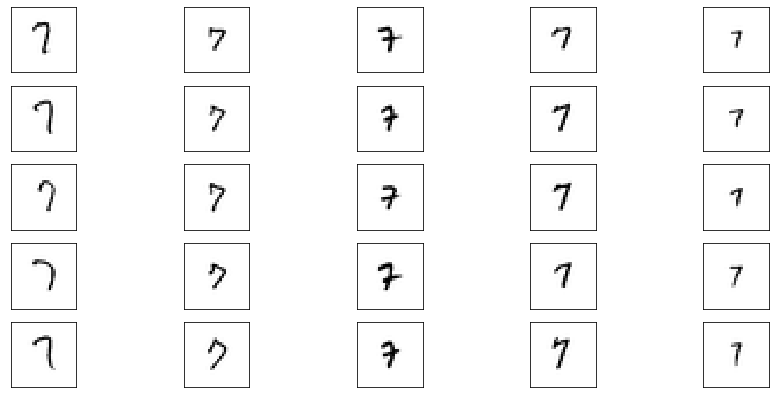

In [11]:
# visualize 7s
examples = get_examples_from_class(classes[7], train_data, users)
fig, axes = plt.subplots(n_examples, len(users), subplot_kw={'xticks': [], 'yticks': []}, figsize=(15, 7))
# , gridspec_kw={'wspace': .5, 'hspace': .1}
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try:
            axes[i, j].imshow(examples[users[j]][i], cmap='gray', interpolation='nearest')
        except IndexError:
            axes[i, j].imshow(np.zeros((28, 28)), cmap='gray')

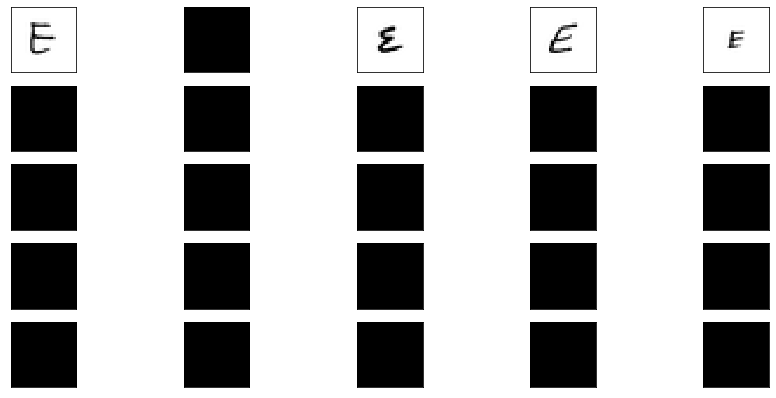

In [12]:
# visualize class E
examples = get_examples_from_class(classes[14], train_data, users)
fig, axes = plt.subplots(n_examples, len(users), subplot_kw={'xticks': [], 'yticks': []}, figsize=(15, 7))
# , gridspec_kw={'wspace': .5, 'hspace': .1}
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try:
            axes[i, j].imshow(examples[users[j]][i], cmap='gray', interpolation='nearest')
        except IndexError:
            axes[i, j].imshow(np.zeros((28, 28)), cmap='gray')

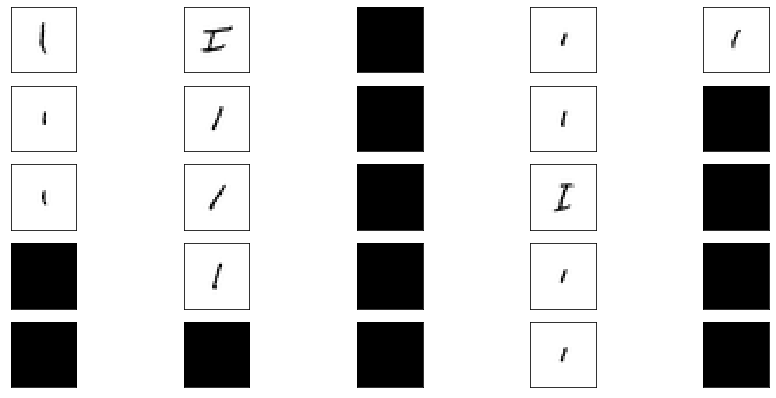

In [13]:
# visualize class I
examples = get_examples_from_class(classes[18], train_data, users)
fig, axes = plt.subplots(n_examples, len(users), subplot_kw={'xticks': [], 'yticks': []}, figsize=(15, 7))
# , gridspec_kw={'wspace': .5, 'hspace': .1}
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try:
            axes[i, j].imshow(examples[users[j]][i], cmap='gray', interpolation='nearest')
        except IndexError:
            axes[i, j].imshow(np.zeros((28, 28)), cmap='gray')

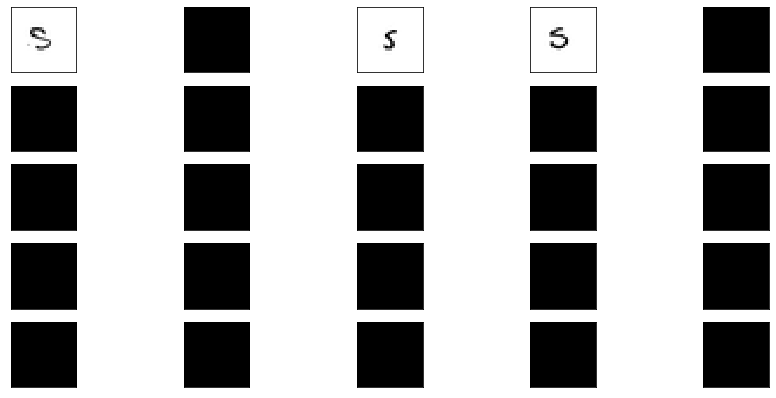

In [14]:
# visualize class s
examples = get_examples_from_class(classes[54], train_data, users)
fig, axes = plt.subplots(n_examples, len(users), subplot_kw={'xticks': [], 'yticks': []}, figsize=(15, 7))
# , gridspec_kw={'wspace': .5, 'hspace': .1}
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try:
            axes[i, j].imshow(examples[users[j]][i], cmap='gray', interpolation='nearest')
        except IndexError:
            axes[i, j].imshow(np.zeros((28, 28)), cmap='gray')

Quick observations:
* Much more digits than letters
* clearly observable inter- and intra-writer variations